## Introduction
The aim of this section is generate event-related fields (ERFs) in response to the visual input and to do some simple plotting. Event-related fields are generated by neuronal activity phase-locked to a given events.

## Preparation
Import the relevant modules.

In [1]:
import os.path as op
import os
import sys
import matplotlib.pyplot as plt
import mne
import numpy as np

See the local paths of the data:

In [2]:
result_path = r'D:\FLUX\results'
file_name = 'training_sss_ica_epo.fif'

path_file  = op.join(result_path,file_name) 

Read the epochs:

In [3]:
epochs = mne.read_epochs(path_file,
                         preload=True,
                         verbose=True)

Reading C:\Users\ferranto\Downloads\flux_sample\results\training_sss_ica_epo.fif ...
    Found the data of interest:
        t =   -2500.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
284 matching events found
No baseline correction applied
0 projection items activated


## Averaging the trial data
Identify the epochs for the condition with the 500 ms picture duration and then average over trials. Subsequently apply a lowpass filter at 30 Hz and crop the data to the time interval from -100 to 400 ms from stimulus onset. The 30 Hz low-pass filter is typically used for cognitive type event-related responses.


In [4]:
evoked_left= epochs['left'].copy().average(method='mean').filter(0.0, 30).crop(-0.1,0.4)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)



## Plotting event-related fields

To plot the single trial and averaged event-related fields for a single magnetometer write:

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 sec)

Not setting metadata
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


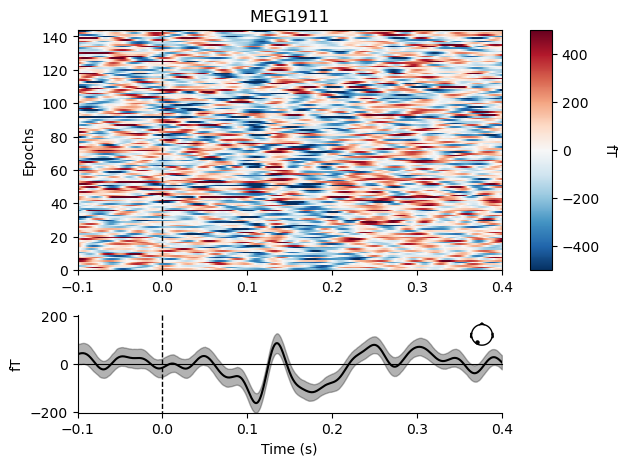

In [5]:
epochs['left'].copy().filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['MEG1911'],vmin=-500,vmax=500);

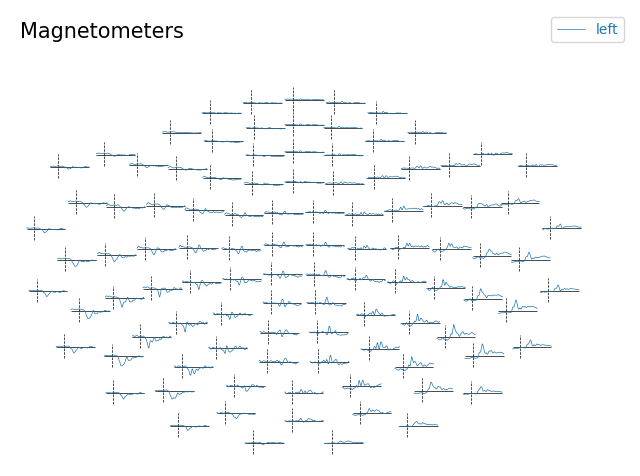

In [6]:
evoked_left.copy().pick_types(meg='mag').plot_topo(title = 'Magnetometers');

Above shows the event-related fields from -100 to 400 ms over each magnetometer. Note the strong response at ~110 ms over posterior sensors. This is often referred to as N100m.

To plot a topographic map of the response at 110 ms write:

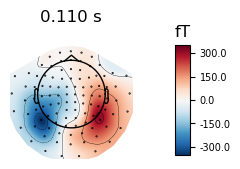

In [7]:
evoked_left.plot_topomap(0.110, ch_type='mag', time_unit='s');

**Question 1:** Explain how an equivalent current dipole (ECD) can explain the posterior event-related field by drawing the ECD on top of the topographic plot (hint: consider the 'right-hand rule')

**Question 2:** Plot a sequence of topographic maps for the time-points ranging from 0 to 300 ms in steps of 20 ms.


Now we plot the same event-related fields over each planar gradiometer. Baseline correction is applyed beforehand *[@ole: why you didn't do the baseline correction for the magnetometer plot?]*.

Applying baseline correction (mode: mean)


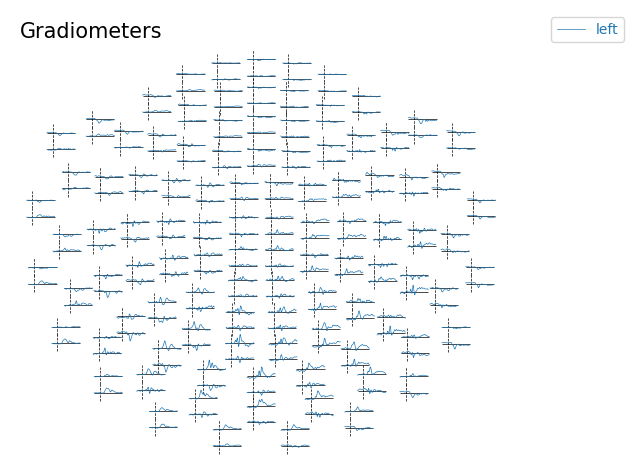

In [8]:
evoked_left.copy().apply_baseline(baseline=(-0.1, 0))
evoked_left.copy().pick_types(meg='grad').plot_topo(title = 'Gradiometers');

The planar gradiometers are arranged in pairs. Each pair is composed of two orthogonal planar sensors (ending in XXX2 and XXX3). It is not straightforward to interpret the field maps for planar gradiometers. Nevertheless, the magnitude of the planar gradiometers is typically the largest directly above a given current dipole.

**Question 3:** Why is the magnitude of the planar gradient typically strongest directly above a current dipole (hint: explain on the basis of the topographic map of the N100m)

To better interpret the planar gradiometers one can apply the root-mean-square operation in which the magnitude of the field for two orthogonal gradiometers are combined:

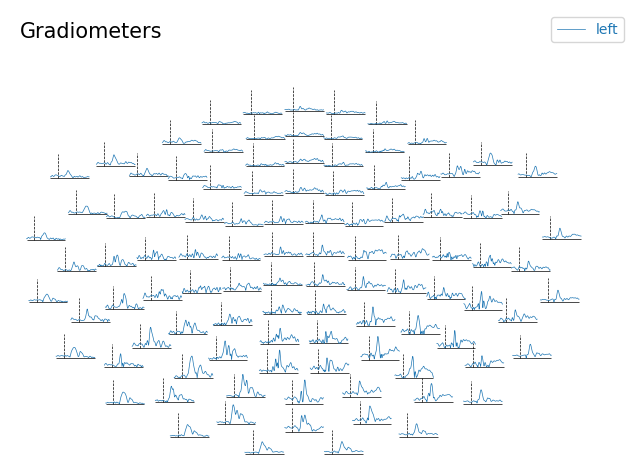

In [9]:
evoked_left.copy().pick_types(meg='grad').plot_topo(title='Gradiometers', merge_grads=True);

To plot a topographic map of the combined planar gradient at 110 ms write:

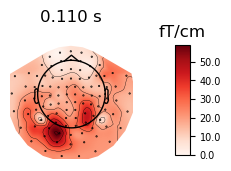

In [10]:
evoked_left.plot_topomap(0.11, ch_type='grad', time_unit='s');

**Question 3:** Interpret the topograpgy of the combined planar gradient in relation to the dipolar map (see Question 1).